In [37]:
import sys
sys.path.append('../')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utility.file_utility import FileUtility
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [38]:
def plot_scatter(ax, X, Y, x_label, y_label, title, legend_loc, label_dict=None, legend_size=7, legend_col=1):
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    
    plt.rc('text', usetex=True)

    target=list(set(Y))
    target.sort()
    color_idx=[target.index(x) for x in Y]
    #color_list=list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys())
    color_list=['green','blue','red','gold', 'cyan']
    #color_list=['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']
    
    for current_color in range(len(target)):
        color=color_list
        current_idxs=[idx for idx,v in enumerate(color_idx) if v==current_color]
        if label_dict:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=label_dict[target[current_color]], cmap='viridis', alpha=0.4, edgecolors=None)
        else:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=target[current_color], cmap='viridis', alpha=0.4, edgecolors=None)
    xlabel(x_label)
    ylabel(y_label)
    plt.xticks([])
    plt.yticks([])
    ax.set_title(title)
    ax.legend(loc=legend_loc, prop={'size': legend_size},ncol=legend_col)

In [14]:
def plot_6_settings(X,X_NN,Y,X_otu,X_NN_otu,Y_otu):
    X_pca = PCA(n_components=50).fit_transform(X.toarray())
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X.toarray())
    X_tsne_NN = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN)
    X_pca_otu = PCA(n_components=50).fit_transform(X_otu.toarray())
    X_tsne_otu = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_otu.toarray())
    X_tsne_NN_otu = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN_otu)
    
    figure(figsize=(15, 10))
    ax=subplot(231)
    plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations', 4)
    ax=subplot(232)
    plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations', 4)
    ax=subplot(233)
    plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network / 6-mers', 4)

    ax=subplot(234)
    plot_scatter(ax, X_pca_otu, Y_otu, 'PCA_1', 'PCA_0', '(iv) PCA over OTU representations', 4)
    ax=subplot(235)
    plot_scatter(ax, X_tsne_otu, Y_otu, 't-SNE_1', 't-SNE_0', '(v) t-SNE over OTU representations', 4)
    ax=subplot(236)
    plot_scatter(ax, X_tsne_NN_otu, Y_otu, 't-SNE_1', 't-SNE_0', '(vi) t-SNE / activation function of the last layer of neural network / OTUs', 4)

    plt.tight_layout()
    return X_pca, X_tsne, X_tsne_NN, X_pca_otu, X_tsne_otu, X_tsne_NN_otu 

In [55]:
def plot_3_settings(X_pca, X_tsne, X_tsne_NN, filename, label_dic):
    
    figure(figsize=(15, 5))
    ax=subplot(131)
    plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations', 'upper right', label_dict=label_dic)
    ax=subplot(132)
    plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations', 'upper right', label_dict=label_dic)
    ax=subplot(133)
    plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network', 'upper left', label_dict=label_dic)
    plt.tight_layout()
    plt.savefig('../results/paper_figures/body-site_visualization.pdf')

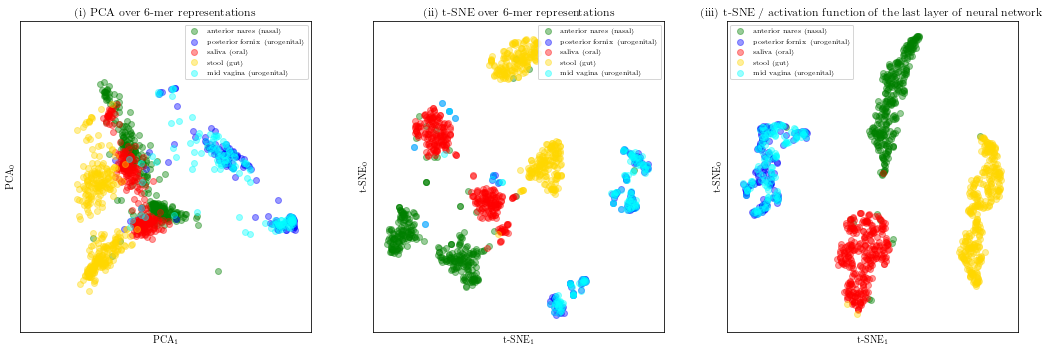

In [56]:
plot_3_settings(X_pca, X_tsne, X_tsne_NN, 'filename',{'saliva':'saliva (oral)','vagina':'mid vagina (urogenital)','nose':'anterior nares (nasal)','stool':'stool (gut)','posterior':'posterior fornix (urogenital)'})# label_dic={'CD':'Crohn disease','Not-CD':'Control or other diseases'})

In [45]:
X=FileUtility.load_sparse_csr('../../datasets/bodysite/6-mers_rate_5000.npz')
X_NN=np.loadtxt('../../datasets/bodysite/Activation_3layers')
Y=FileUtility.load_list('../../datasets/bodysite/data_config/labels_phen.txt')

#X_otu=FileUtility.load_sparse_csr('../../datasets/bodysite/otu_1122.npz')
#X_NN_otu=np.loadtxt('../../datasets/bodysite/Activation_3layers_otu')
#Y_otu=FileUtility.load_list('../../datasets/bodysite/otu_1122.txt')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1192 samples in 0.098s...
[t-SNE] Computed neighbors for 1192 samples in 10.550s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1192
[t-SNE] Computed conditional probabilities for sample 1192 / 1192
[t-SNE] Mean sigma: 0.005415
[t-SNE] Computed conditional probabilities in 0.095s
[t-SNE] Iteration 50: error = 68.5174026, gradient norm = 0.0022519 (50 iterations in 0.869s)
[t-SNE] Iteration 100: error = 52.4343987, gradient norm = 0.0073951 (50 iterations in 0.865s)
[t-SNE] Iteration 150: error = 50.5163651, gradient norm = 0.0031960 (50 iterations in 0.843s)
[t-SNE] Iteration 200: error = 49.9053841, gradient norm = 0.0019303 (50 iterations in 0.830s)
[t-SNE] Iteration 250: error = 49.6043930, gradient norm = 0.0014442 (50 iterations in 0.831s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.604393
[t-SNE] Iteration 300: error = 1.0576031, gradient norm = 0.0047623 (50 iterations in 0.836

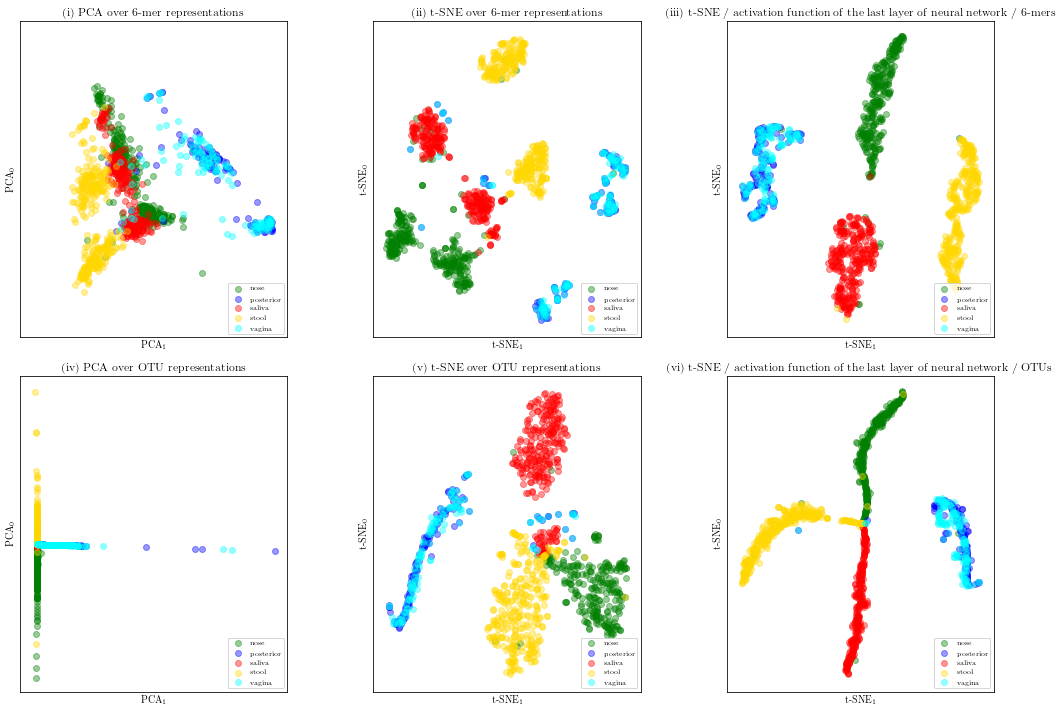

In [46]:
X_pca, X_tsne, X_tsne_NN, X_pca_otu, X_tsne_otu, X_tsne_NN_otu = plot_6_settings(X,X_NN,Y,X_otu,X_NN_otu,Y_otu)

# Bodysites


In [14]:
X=FileUtility.load_sparse_csr('../../datasets/bodysite/6-mers_rate_5000.npz')
X_NN=np.loadtxt('../../datasets/bodysite/Activation_3layers')
Y=FileUtility.load_list('../../datasets/bodysite/data_config/labels_phen.txt')

In [16]:
X_pca = PCA(n_components=50).fit_transform(X.toarray())
X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X.toarray())
X_tsne_NN = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1192 samples in 0.186s...
[t-SNE] Computed neighbors for 1192 samples in 13.447s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1192
[t-SNE] Computed conditional probabilities for sample 1192 / 1192
[t-SNE] Mean sigma: 0.005415
[t-SNE] Computed conditional probabilities in 0.161s
[t-SNE] Iteration 50: error = 68.5129623, gradient norm = 0.0024772 (50 iterations in 1.296s)
[t-SNE] Iteration 100: error = 52.5089760, gradient norm = 0.0077033 (50 iterations in 1.332s)
[t-SNE] Iteration 150: error = 50.4600029, gradient norm = 0.0031415 (50 iterations in 1.224s)
[t-SNE] Iteration 200: error = 49.8486214, gradient norm = 0.0018345 (50 iterations in 1.221s)
[t-SNE] Iteration 250: error = 49.5493813, gradient norm = 0.0013534 (50 iterations in 1.218s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.549381
[t-SNE] Iteration 300: error = 1.0551023, gradient norm = 0.0046798 (50 iterations in 1.226

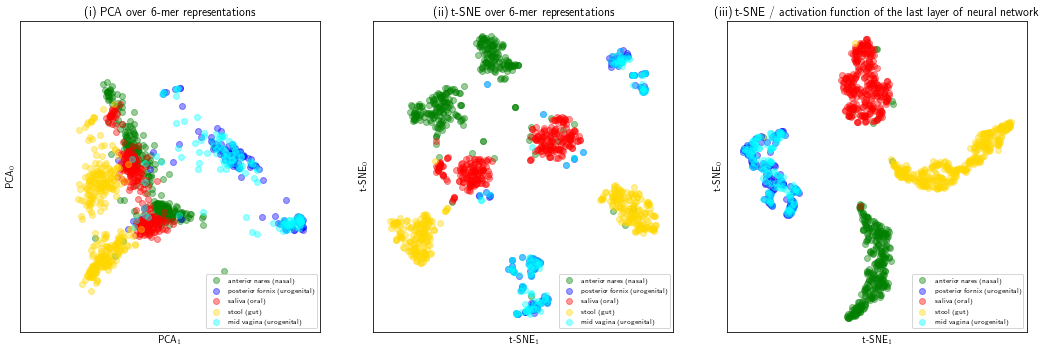

In [177]:
label_dict={'saliva':'saliva (oral)','vagina':'mid vagina (urogenital)','nose':'anterior nares (nasal)','stool':'stool (gut)','posterior':'posterior fornix (urogenital)'}
figure(figsize=(15, 5))
ax=subplot(131)
plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations', 4, label_dict)
ax=subplot(132)
plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations', 4, label_dict)
ax=subplot(133)
plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network', 4, label_dict)
plt.tight_layout()
plt.savefig('../results/paper_figures/bodysite_visualization.pdf')

#  Crohn

In [3]:
X_otu=FileUtility.load_sparse_csr('../../datasets/crohn/otu_complete1359.npz')
Y=[x for x in FileUtility.load_list('../../datasets/crohn/data_config/labels_disease_complete1359.txt')]
X_pca_otu = PCA(n_components=50).fit_transform(X_otu.toarray())
X_tsne_otu = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_otu.toarray())
X_NN_otu=np.loadtxt('../../datasets/crohn/Activation_5layers_otu')
X_tsne_NN_otu = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN_otu)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1359 samples in 0.442s...
[t-SNE] Computed neighbors for 1359 samples in 24.728s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1359
[t-SNE] Computed conditional probabilities for sample 1359 / 1359
[t-SNE] Mean sigma: 958.370068
[t-SNE] Computed conditional probabilities in 0.315s
[t-SNE] Iteration 50: error = 67.2603607, gradient norm = 0.0000091 (50 iterations in 1.352s)
[t-SNE] Iteration 100: error = 66.8715286, gradient norm = 0.0047755 (50 iterations in 1.589s)
[t-SNE] Iteration 150: error = 65.4057617, gradient norm = 0.0006873 (50 iterations in 1.404s)
[t-SNE] Iteration 200: error = 65.3748703, gradient norm = 0.0000493 (50 iterations in 1.189s)
[t-SNE] Iteration 250: error = 65.3739243, gradient norm = 0.0000273 (50 iterations in 1.170s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.373924
[t-SNE] Iteration 300: error = 1.5927353, gradient norm = 0.0046908 (50 iterations in 1.1

In [21]:
X=FileUtility.load_sparse_csr('../../datasets/crohn/6-mers_rate_complete1359_seq_5000.npz')
Y=[x for x in FileUtility.load_list('../../datasets/crohn/data_config/labels_disease_complete1359.txt')]
X_pca = PCA(n_components=50).fit_transform(X.toarray())
X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X.toarray())
X_NN=np.loadtxt('../../datasets/crohn/Activation_CD_complete1359')
X_tsne_NN = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1359 samples in 0.114s...
[t-SNE] Computed neighbors for 1359 samples in 10.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1359
[t-SNE] Computed conditional probabilities for sample 1359 / 1359
[t-SNE] Mean sigma: 0.005930
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 69.3793030, gradient norm = 0.0000090 (50 iterations in 1.145s)
[t-SNE] Iteration 100: error = 66.4347916, gradient norm = 0.0041979 (50 iterations in 1.321s)
[t-SNE] Iteration 150: error = 65.8444214, gradient norm = 0.0000519 (50 iterations in 1.118s)
[t-SNE] Iteration 200: error = 65.8430634, gradient norm = 0.0000241 (50 iterations in 1.107s)
[t-SNE] Iteration 250: error = 65.8434372, gradient norm = 0.0000254 (50 iterations in 1.108s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.843437
[t-SNE] Iteration 300: error = 1.6824192, gradient norm = 0.0045050 (50 iterations in 1.111

IndexError: index 559 is out of bounds for axis 0 with size 558

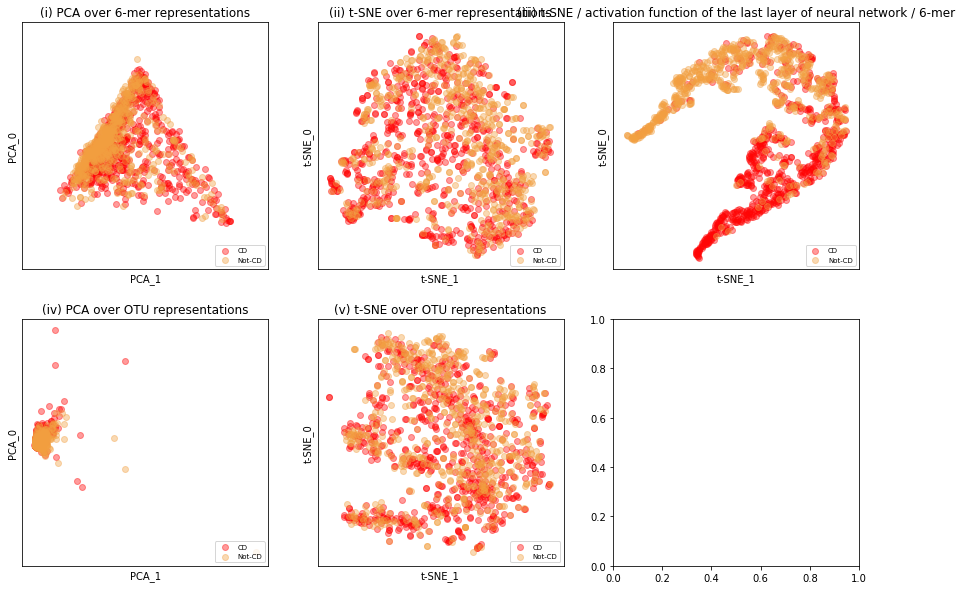

In [5]:
figure(figsize=(15, 10))
ax=subplot(231)
plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations', 4)
ax=subplot(232)
plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations', 4)
ax=subplot(233)
plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network / 6-mer', 4)

ax=subplot(234)
plot_scatter(ax, X_pca_otu, Y, 'PCA_1', 'PCA_0', '(iv) PCA over OTU representations', 4)
ax=subplot(235)
plot_scatter(ax, X_tsne_otu, Y, 't-SNE_1', 't-SNE_0', '(v) t-SNE over OTU representations', 4)
ax=subplot(236)
plot_scatter(ax, X_tsne_NN_otu, Y, 't-SNE_1', 't-SNE_0', '(vi) t-SNE / activation function of the last layer of neural network / OTU', 4)

plt.tight_layout()
plt.savefig('../results/paper_figures/crohn_visualization.pdf')

In [34]:
np.savetxt('../../datasets/env/data_config/rand_idx_eco',rand_idx)
rand_idx=np.random.choice(18000, 1800, replace=False)
Y=[x for x in FileUtility.load_list('../../datasets/env/data_config/cpe_eco_label')]
Y=[Y[idx] for idx in list(rand_idx)]

In [53]:
np.savetxt('../../datasets/env/data_config/rand_idx_eco',rand_idx)

In [39]:
X_cpe=FileUtility.load_sparse_csr('../../datasets/env/cpe_eco.npz')
X_pca_cpe = PCA(n_components=50).fit_transform(X_cpe[rand_idx,:].toarray())
X_tsne_cpe = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_cpe[rand_idx,:].toarray())

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.963s...
[t-SNE] Computed neighbors for 1800 samples in 64.844s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 0.034505
[t-SNE] Computed conditional probabilities in 0.208s
[t-SNE] Iteration 50: error = 74.0017471, gradient norm = 0.2816689 (50 iterations in 3.610s)
[t-SNE] Iteration 100: error = 74.5531998, gradient norm = 0.3042184 (50 iterations in 3.752s)
[t-SNE] Iteration 150: error = 76.5355301, gradient norm = 0.7785245 (50 iterations in 3.727s)
[t-SNE] Iteration 200: error = 76.1584320, gradient norm = 0.8441603 (50 iterations in 4.151s)
[t-SNE] Iteration 250: error = 73.2629547, gradient norm = 0.4110510 (50 iterations in 3.749s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.262955
[t-SNE] Iteration 300: error = 3.0552747, gradient norm = 0.0238262 (50 iterations in 2.657

In [36]:
X_pca = PCA(n_components=50).fit_transform(X[rand_idx,:].toarray())
X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X[rand_idx,:].toarray())


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.300s...
[t-SNE] Computed neighbors for 1800 samples in 27.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 0.015425
[t-SNE] Computed conditional probabilities in 0.239s
[t-SNE] Iteration 50: error = 70.5911484, gradient norm = 0.0010012 (50 iterations in 2.440s)
[t-SNE] Iteration 100: error = 65.6398163, gradient norm = 0.0081924 (50 iterations in 2.364s)
[t-SNE] Iteration 150: error = 63.6340065, gradient norm = 0.0007119 (50 iterations in 2.357s)
[t-SNE] Iteration 200: error = 63.5172234, gradient norm = 0.0001500 (50 iterations in 2.371s)
[t-SNE] Iteration 250: error = 63.5103607, gradient norm = 0.0000366 (50 iterations in 2.405s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.510361
[t-SNE] Iteration 300: error = 1.8884690, gradient norm = 0.0050094 (50 iterations in 2.487

In [51]:
X_NN_eco=np.loadtxt('../../datasets/env/Activation_6layers_eco')
X_tsne_NN_eco = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN_eco[rand_idx,:])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.004s...
[t-SNE] Computed neighbors for 1800 samples in 1.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.622811
[t-SNE] Computed conditional probabilities in 0.580s
[t-SNE] Iteration 50: error = 74.4645538, gradient norm = 0.0002894 (50 iterations in 8.338s)
[t-SNE] Iteration 100: error = 64.5467834, gradient norm = 0.0038039 (50 iterations in 17.231s)
[t-SNE] Iteration 150: error = 62.2454414, gradient norm = 0.0016162 (50 iterations in 8.660s)
[t-SNE] Iteration 200: error = 61.8449402, gradient norm = 0.0003548 (50 iterations in 7.248s)
[t-SNE] Iteration 250: error = 61.7736359, gradient norm = 0.0002151 (50 iterations in 11.761s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.773636
[t-SNE] Iteration 300: error = 1.6571931, gradient norm = 0.0053823 (50 iterations in 9.56

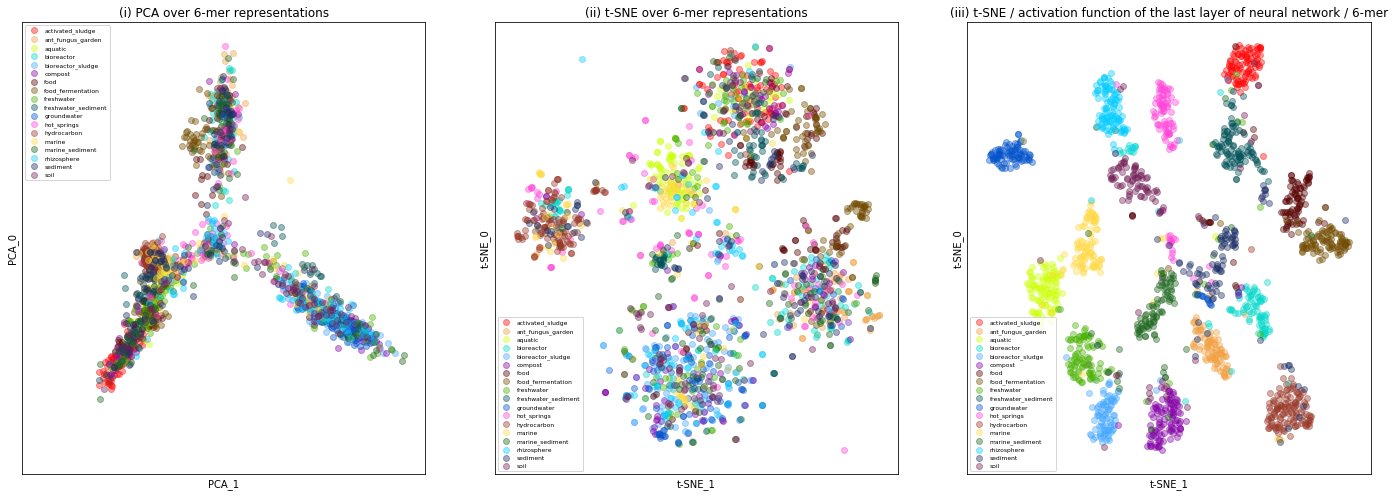

In [65]:
figure(figsize=(20, 7))
ax=subplot(131)
plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations','upper left',legend_size=6, legend_col=1)
ax=subplot(132)
plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations','lower left',legend_size=6, legend_col=1)
ax=subplot(133)
plot_scatter(ax, X_tsne_NN_eco, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network / 6-mer' ,'lower left',legend_size=6, legend_col=1)

plt.tight_layout()
plt.savefig('../results/paper_figures/eco_visualinvzation_restricted.pdf')

In [48]:
Y_org=[x for x in FileUtility.load_list('../../datasets/env/data_config/org_label_restrictedkmer.txt')]
X_org=FileUtility.load_sparse_csr('../../datasets/env/6-mer_org_restrictedkmer.npz')
X_pca_org = PCA(n_components=50).fit_transform(X_org.toarray())
X_tsne_org = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_org.toarray())

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3100 samples in 2.427s...
[t-SNE] Computed neighbors for 3100 samples in 526.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3100
[t-SNE] Computed conditional probabilities for sample 2000 / 3100
[t-SNE] Computed conditional probabilities for sample 3000 / 3100
[t-SNE] Computed conditional probabilities for sample 3100 / 3100
[t-SNE] Mean sigma: 0.018659
[t-SNE] Computed conditional probabilities in 2.127s
[t-SNE] Iteration 50: error = 77.8525314, gradient norm = 0.0000581 (50 iterations in 26.035s)
[t-SNE] Iteration 100: error = 75.6241455, gradient norm = 0.0119788 (50 iterations in 20.096s)
[t-SNE] Iteration 150: error = 71.1896744, gradient norm = 0.0003267 (50 iterations in 22.597s)
[t-SNE] Iteration 200: error = 71.0201721, gradient norm = 0.0002420 (50 iterations in 27.711s)
[t-SNE] Iteration 250: error = 70.9679184, gradient norm = 0.0000985 (50 iterations in 26.474s)
[t-SNE] KL divergence after 250

In [68]:
X_NN_org=np.loadtxt('../../datasets/env/Activation_6layers_org')
X_tsne_NN_org = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN_org)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3100 samples in 0.007s...
[t-SNE] Computed neighbors for 3100 samples in 5.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3100
[t-SNE] Computed conditional probabilities for sample 2000 / 3100
[t-SNE] Computed conditional probabilities for sample 3000 / 3100
[t-SNE] Computed conditional probabilities for sample 3100 / 3100
[t-SNE] Mean sigma: 1.389204
[t-SNE] Computed conditional probabilities in 0.750s
[t-SNE] Iteration 50: error = 81.0397644, gradient norm = 0.0000168 (50 iterations in 12.520s)
[t-SNE] Iteration 100: error = 69.8081055, gradient norm = 0.0092929 (50 iterations in 16.026s)
[t-SNE] Iteration 150: error = 63.6511383, gradient norm = 0.0023551 (50 iterations in 20.619s)
[t-SNE] Iteration 200: error = 62.5440865, gradient norm = 0.0013122 (50 iterations in 21.302s)
[t-SNE] Iteration 250: error = 62.0624046, gradient norm = 0.0009257 (50 iterations in 17.266s)
[t-SNE] KL divergence after 250 i

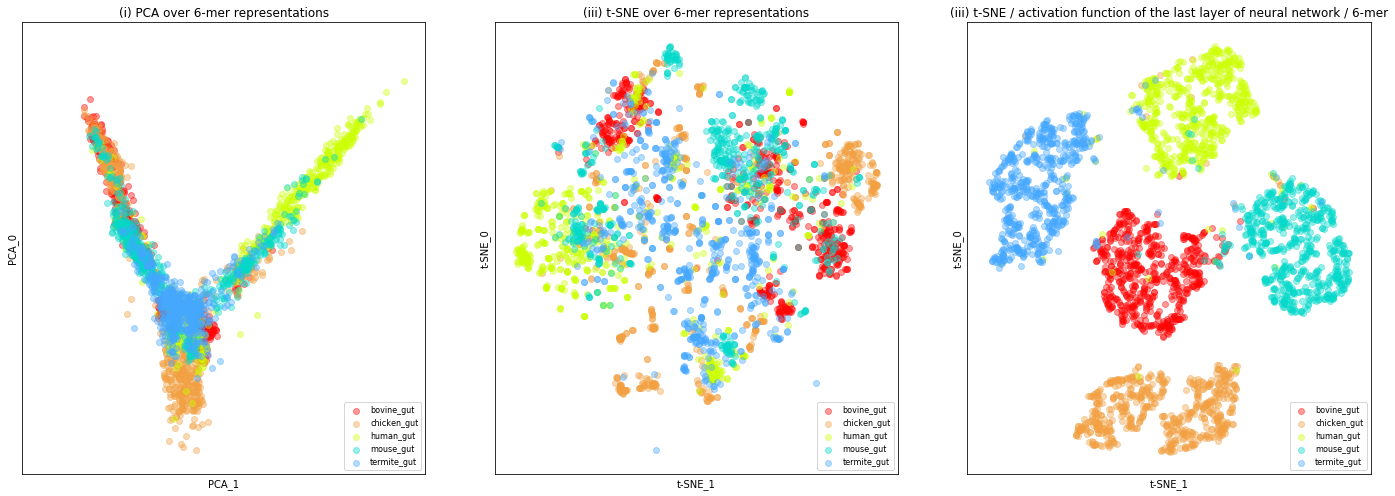

In [72]:
figure(figsize=(20, 7))
ax=subplot(131)
plot_scatter(ax, X_pca_org, Y_org, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations','lower right',legend_size=8, legend_col=1)
ax=subplot(132)
plot_scatter(ax, X_tsne_org, Y_org, 't-SNE_1', 't-SNE_0', '(iii) t-SNE over 6-mer representations', 'lower right',legend_size=8, legend_col=1)
ax=subplot(133)
plot_scatter(ax, X_tsne_NN_org, Y_org, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network / 6-mer' ,'lower right',legend_size=8, legend_col=1)


plt.tight_layout()
plt.savefig('../results/paper_figures/org_visualinvzation_restricted.pdf')